# Avance Proyecto 1: Análisis eploratorio

### Subtítulo:
Descripción de por qué es necesario

In [10]:
#Código

### Cantidad de compras registradas por la tienda:

Es importante conocer el tamaño de la base de datos y cuántas compras fueron registradas para tener idea del volumen de información.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo
df = pd.read_csv("../datasets/customer_purchases/customer_purchases_train.csv")

# Total de compras
total_ventas = len(df)
print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


### Cantidad de clientes:
Identificar el número de clientes únicos permite estimar la diversidad de usuarios y su participación en la tienda.

In [33]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()
print(f"Cantidad de clientes únicos: {unique_customers}")

Cantidad de clientes únicos: 500


### Rangos de edad de usuarios

Conocer la edad mínima, máxima y promedio permite segmentar clientes en grupos demográficos.

EDADES DE LOS USUARIOS:
Edad mínima: 18 años
Edad máxima: 74 años
Edad promedio: 41.0 años
Edad mediana: 40.5 años


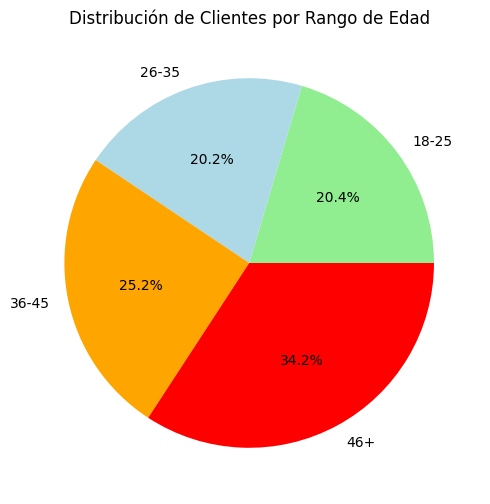


Agregado a 'customer_profile.csv'


In [69]:
# Base con clientes únicos
customer_profile = pd.DataFrame(df['customer_id'].unique(), columns=['customer_id'])

# Total de compras
customer_freq = df['customer_id'].value_counts().reset_index()
customer_freq.columns = ['customer_id','total_compras']
customer_profile = customer_profile.merge(customer_freq, on='customer_id', how='left')

# Género
customer_genders = df.groupby('customer_id')['customer_gender'].first()
customer_profile = customer_profile.merge(customer_genders, on='customer_id', how='left')

# Edad
ref_date = pd.to_datetime("2025-09-21")
df['edad'] = (ref_date - pd.to_datetime(df['customer_date_of_birth'])).dt.days // 365
customer_ages = df.groupby('customer_id')['edad'].first()
customer_profile = customer_profile.merge(customer_ages, on='customer_id', how='left')

print("EDADES DE LOS USUARIOS:")
print(f"Edad mínima: {customer_ages.min()} años")
print(f"Edad máxima: {customer_ages.max()} años")
print(f"Edad promedio: {customer_ages.mean():.1f} años")
print(f"Edad mediana: {customer_ages.median()} años")

# Segmentación por rangos
rangos = {'18-25': (18,25), '26-35': (26,35), '36-45': (36,45), '46+': (46,100)}
segmentos_edad = {}
for rango, (min_e, max_e) in rangos.items():
    if rango == '46+':
        clientes = customer_ages[customer_ages >= min_e]
    else:
        clientes = customer_ages[(customer_ages >= min_e) & (customer_ages <= max_e)]
    segmentos_edad[rango] = len(clientes)

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(segmentos_edad.values(), labels=segmentos_edad.keys(), autopct='%1.1f%%',
        colors=['lightgreen','lightblue','orange','red'])
plt.title('Distribución de Clientes por Rango de Edad')
plt.show()

# Guardar CSV
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Genero de los usuarios:

Permite observar la distribución de clientes según género, lo cual puede relacionarse con preferencias de productos.

SEGMENTACIÓN POR GÉNERO:
male: 195 clientes
female: 192 clientes
No specified: 113 clientes


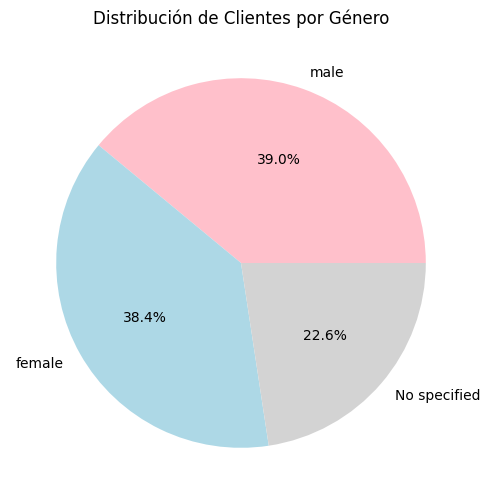


Agregado a 'customer_profile.csv'


In [101]:
# Reemplazar valores nulos por "No specified"
customer_profile['customer_gender'] = customer_profile['customer_gender'].fillna('No specified')

# Conteo y print
genero_counts = customer_profile['customer_gender'].value_counts()

print("SEGMENTACIÓN POR GÉNERO:")
for genero, cantidad in genero_counts.items():
    print(f"{genero}: {cantidad} clientes")

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%',
        colors=['pink','lightblue','lightgray'])
plt.title('Distribución de Clientes por Género')
plt.show()

# Guardar
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")


### Clientes con múltiples compras:



SEGMENTACIÓN DE CLIENTES (cada 5 compras):
1-5 compras: 9 clientes
6-10 compras: 106 clientes
11-15 compras: 189 clientes
16-20 compras: 123 clientes
21-25 compras: 58 clientes
26-30 compras: 13 clientes
31-35 compras: 2 clientes


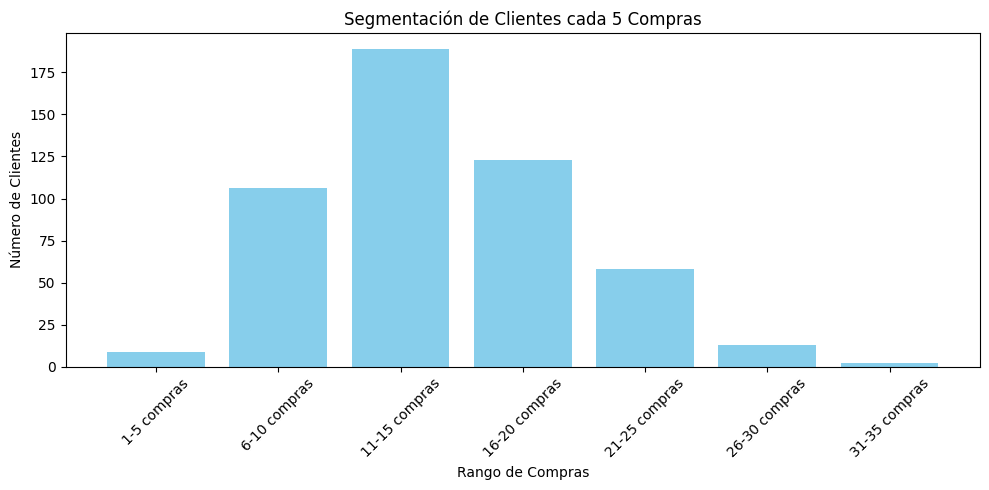


Agregado a 'customer_profile.csv'


In [89]:
# Recalcular total_compras limpio
customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('total_compras')], errors='ignore')
customer_freq = df['customer_id'].value_counts().reset_index()
customer_freq.columns = ['customer_id','total_compras']
customer_profile = customer_profile.merge(customer_freq, on='customer_id', how='left')
customer_profile['total_compras'] = customer_profile['total_compras'].fillna(0).astype(int)

# Segmentación cada 5 compras
segmentos_para_grafico = {}
m = int(customer_profile['total_compras'].max())
for i in range(1, m + 1, 5):
    seg_min, seg_max = i, i + 4
    seg_name = f'{seg_min}-{seg_max} compras'
    n = ((customer_profile['total_compras'] >= seg_min) & (customer_profile['total_compras'] <= seg_max)).sum()
    if n > 0:
        segmentos_para_grafico[seg_name] = int(n)

print("SEGMENTACIÓN DE CLIENTES (cada 5 compras):")
for seg, cant in segmentos_para_grafico.items():
    print(f"{seg}: {cant} clientes")

plt.figure(figsize=(10,5))
plt.bar(list(segmentos_para_grafico.keys()), list(segmentos_para_grafico.values()), color='skyblue')
plt.title('Segmentación de Clientes cada 5 Compras')
plt.xlabel('Rango de Compras')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")


### Promedio de gasto por usuario


In [93]:
# Gasto promedio por cliente
avg_spending = df.groupby('customer_id')['item_price'].mean().reset_index()
avg_spending.columns = ['customer_id','gasto_promedio']

# Unir al perfil
customer_profile = customer_profile.merge(avg_spending, on='customer_id', how='left')

# Reemplazar valores vacíos
customer_profile['gasto_promedio'] = customer_profile['gasto_promedio'].fillna(0)

print("PROMEDIO DE GASTO POR USUARIO:")
print(f"Gasto promedio mínimo: ${customer_profile['gasto_promedio'].min():.2f}")
print(f"Gasto promedio máximo: ${customer_profile['gasto_promedio'].max():.2f}")
print(f"Gasto promedio general: ${customer_profile['gasto_promedio'].mean():.2f}")
print(f"Gasto promedio mediano: ${customer_profile['gasto_promedio'].median():.2f}")

# Histograma
plt.figure(figsize=(10,6))
plt.hist(customer_profile['gasto_promedio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Promedio de Gasto por Usuario')
plt.xlabel('Promedio de gasto ($)')
plt.ylabel('Número de clientes')
plt.show()

# Guardar
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

MergeError: Passing 'suffixes' which cause duplicate columns {'gasto_promedio_x'} is not allowed.